# Project-1 : Red Wine Quality Prediction

**Project Description : 
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)**

**This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**


**Attributes Information:**

     **Input variables (based on physicochemical tests):**
     
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol

     **Output variable (based on sensory data):**
 
    12 - quality (score between 0 and 10)
   

In [86]:
# Let's start with importing necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [87]:
# Let's import Dataset:


data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:
# Let's just have top 5 rows for further process:

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
data.shape

# There are 1599 rows and 12 columns.

(1599, 12)

In [90]:
# Checking for Datatypes of features:

data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [91]:
# Checking for Null values:

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Great , There is no null values , so we can go ahead.**

In [92]:
# Let's the statistics of data :

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization :

**Let's visualize the data , to analyse relationship between features and label.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

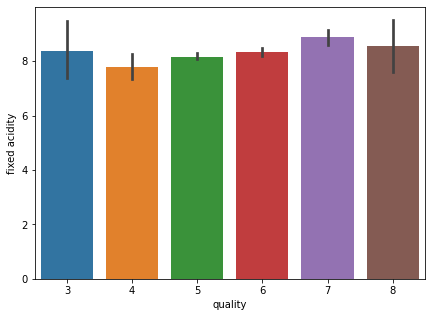

In [93]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

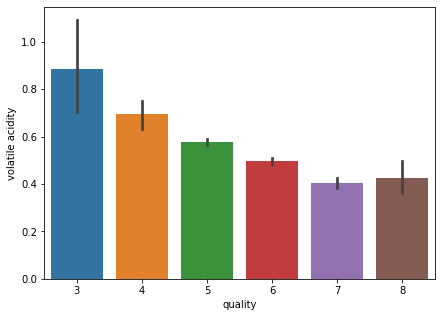

In [94]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

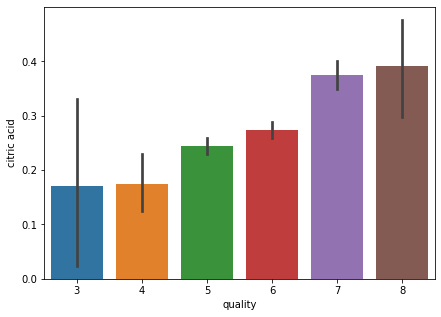

In [95]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

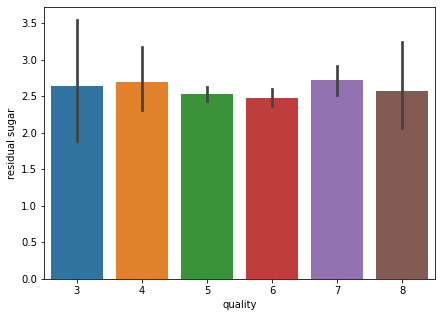

In [96]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

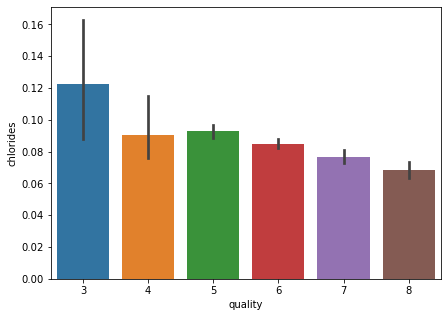

In [97]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

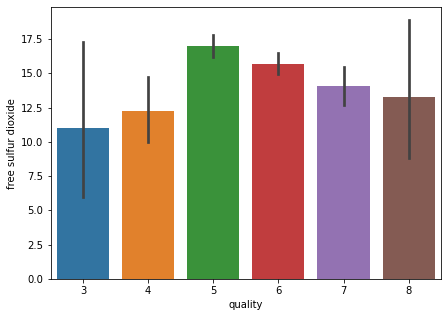

In [98]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

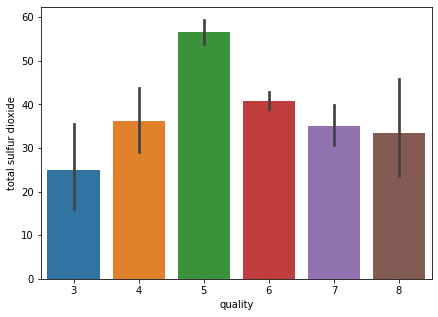

In [99]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

<AxesSubplot:xlabel='quality', ylabel='density'>

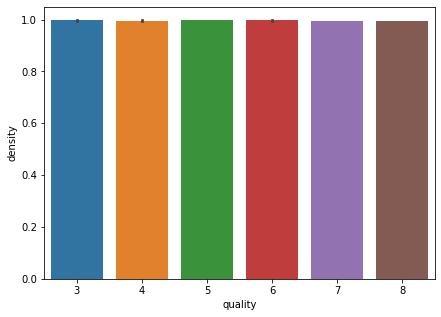

In [100]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'density', data = data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

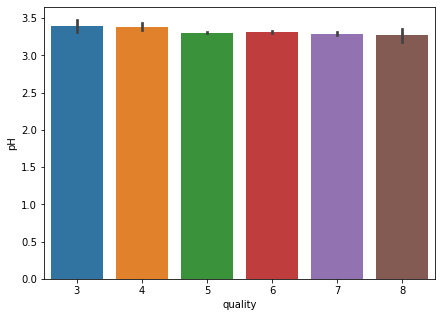

In [101]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'pH', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

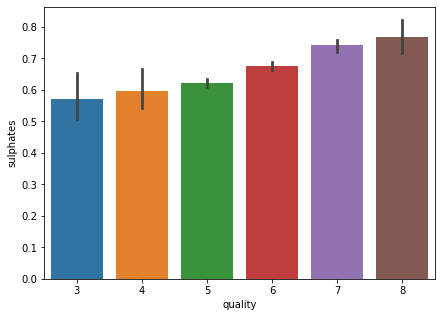

In [102]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

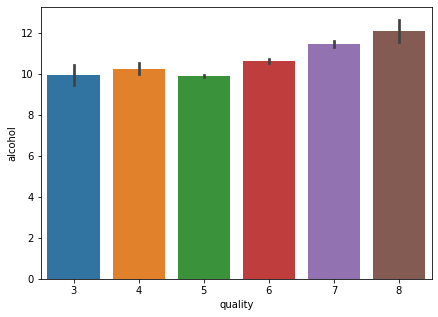

In [103]:
fig = plt.figure(figsize = (7,5))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

In [104]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Let's classify the wine quality as good or bad based on condition:**

           Not good or 0 , if the quality of the wine lies in the range (3,6) , and
           Good or 1 , if the quality of the wine lies in the range (7,8).

In [105]:
data['quality']=data['quality'].apply(lambda x:1 if x > 6.5 else 0)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [106]:
# To verify , if it is changes or not:

data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

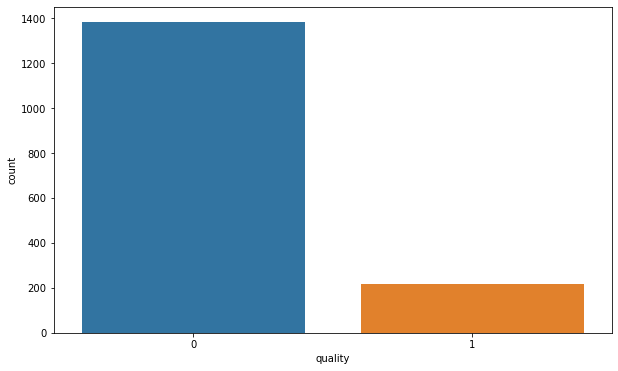

In [107]:
# let's plot it to analyse visually :

fig = plt.figure(figsize=(10,6))
sns.countplot(data['quality'])

**Conclusion : So , we have changed quality data to 0 and 1 i.e not good or good . And we observed that the mejor portion of data contains bad wine with count = 1382  , and remainder portion contains good wine with count = 217.**

In [108]:
# Let's separate features and Label :

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [109]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [110]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

**Let's split for train and test , before splitting firstly we have to import some necessary libraries:**

In [121]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

In [112]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.2 ,random_state = 42) 

In [113]:
#Let's find how much data is divided for training and testing :

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


**StandardScaler : Let's apply StandardScaler to dataset to scale all the fiels values to approx same scale , as some of the columns values are not scaled .**

In [114]:
scaler = StandardScaler()

In [115]:
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [116]:
# Let's write one function and call as many times to check accuracy score of different models:

def metric_score(clf , x_train , x_test , y_train , y_test , train=True):
    if train:
        y_pred = clf.predict(x_train)

        print("\n==============Train Result==========")
        
        print(f"=======accuracy_score:{accuracy_score(y_train , y_pred)*100:.2f}%")
        
    elif train ==False:
        
        pred = clf.predict(x_test)
        
        print("\n===============Test Result===========")
        
        print(f"accuracy_score:{accuracy_score(y_test , pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test ,pred,digits=2)) #Model confindence/accurcy.

In [117]:
# Model Initiation:

clf = DecisionTreeClassifier()
clf.fit(x_train , y_train)  # for training

DecisionTreeClassifier()

In [118]:
# Call the function and pass dataset to check train and test score:

metric_score(clf,x_train,x_test , y_train , y_test ,train= True)  # This is for training score
metric_score(clf,x_train,x_test , y_train , y_test ,train= False)  # This is for testing score


==============Train Result==========
=======accuracy_score:100.00%

===============Test Result===========
accuracy_score:84.38%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       273
           1       0.47      0.47      0.47        47

    accuracy                           0.84       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.84      0.84      0.84       320



**Conclusion : Here we have  , training result is 100% and testing result is 84%.**

Based on the information provided, it appears that the decision tree model is overfitting the training data, as evidenced by the 100% training score. This means that the model is able to perfectly predict the outcomes in the training set, but may not perform as well on new data.

The fact that the testing score is 84% suggests that the model is performing reasonably well on new data, but there is still room for improvement. This could be due to a variety of factors, such as the complexity of the decision tree, the size of the dataset, or the quality of the features used.

  # Hyperparameter Tuning :  
  
  **Let's now try to tune some hyperparameters using the GridSearchCV Algorithm.
GridSearchCV is a method used to tune our hyperparameters. We can pass different values of Hyperparameters as parameters for GridSearch .Using Cross validation score , GridSearch returns the combination of Hyperparameters for which the model is performing the best.**

In [119]:
# We are tuning four important hyperparameters right now ,We are passing different values for both:

grid_param = {'criterion':['gini','entropy'],
             'max_depth': range(10,15),       #The maximum depth of Tree
             'min_samples_leaf': range(2,6),   # The min. no. of samples required to be at leaf node.
             'min_samples_split': range(3,8),  # The min. no. of samples required to split an interval node.
             'max_leaf_nodes': range(5,10)}    # Best nodes are defined as the relatve reduction in impurity. If none then unlimited no. of leaf nodes.

In [122]:
grid_search = GridSearchCV(estimator = clf , param_grid = grid_param ,cv= 5 , n_jobs = -1)

# estimator means which model we are using.
# param_grid will take the parameters.
# cv is cross validation , don't increase cv , so time and money also increases.
# n_jobs = -1 , if system taking lot of time , then use this , it will improve little bit of performance.

In [123]:
grid_search.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [124]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [125]:
# Initiate DecisionTreeClassifier with new parameters and train:

clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 3 ,max_leaf_nodes= 7, max_depth = 10 , min_samples_leaf =2)

# Train the  model:

clf.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=3)

In [126]:
# AGAIN , Call the function and pass dataset to check train and test score:

metric_score(clf,x_train,x_test , y_train , y_test ,train= True)  # This is for training score
metric_score(clf,x_train,x_test , y_train , y_test ,train= False)  # This is for testing score


==============Train Result==========
=======accuracy_score:89.60%

===============Test Result===========
accuracy_score:85.31%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       273
           1       0.50      0.32      0.39        47

    accuracy                           0.85       320
   macro avg       0.69      0.63      0.65       320
weighted avg       0.83      0.85      0.84       320



**Conclusion: In conclusion, the decision tree model appears to be a good fit for the data and is able to capture a large portion of the patterns in the data without overfitting.**